In [1]:

!pip install catboost lightgbm


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb  # LightGBM
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")


훈련용

In [21]:
# 데이터 로드
path = './data/rainfall_train.csv'


데이터 읽기

In [23]:
df = pd.read_csv(path)

# 데이터 전처리
df = df[df['rainfall_train.vv'] >= 0]

# 중복된 행 확인
duplicates = df.duplicated()

# 중복된 행의 개수 출력
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows in train_X: {num_duplicates}")

# 중복된 행이 있는 경우, 이를 표시
if num_duplicates > 0:
    print("Duplicate rows in train_X:")
    print(df[duplicates])


Number of duplicate rows in train_X: 0


In [24]:
# 문자열 값을 숫자로 변환
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].astype(str).astype('category').cat.codes

# 특성 및 타겟 분리
X = df.drop(columns=['rainfall_train.class_interval'])
y = df[['rainfall_train.class_interval']]


X['prob_0'] = 100 - X['rainfall_train.v01']
X['prob_1'] = X['rainfall_train.v01'] - X['rainfall_train.v02']
X['prob_2'] = X['rainfall_train.v02'] - X['rainfall_train.v03']
X['prob_3'] = X['rainfall_train.v03'] - X['rainfall_train.v04']
X['prob_4'] = X['rainfall_train.v04'] - X['rainfall_train.v05']
X['prob_5'] = X['rainfall_train.v05'] - X['rainfall_train.v06']
X['prob_6'] = X['rainfall_train.v06'] - X['rainfall_train.v07']
X['prob_7'] = X['rainfall_train.v07'] - X['rainfall_train.v08']
X['prob_8'] = X['rainfall_train.v08'] - X['rainfall_train.v09']
X['prob_9'] = X['rainfall_train.v09']

features = [col for col in X.columns if 'prob_' in col] + ['rainfall_train.dh']
X = X[features]

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
display(len(df))
display(df.head())
display(df.columns)

1448762

,Unnamed: 0,rainfall_train.fc_year,rainfall_train.fc_month,rainfall_train.fc_day,rainfall_train.fc_hour,rainfall_train.stn4contest,rainfall_train.dh,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,...,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,rainfall_train.vv,rainfall_train.class_interval
0,1,0,5,1,9,0,3,0,5,1,...,0,0,0,0,0,0,0,0,0.0,0
1,2,0,5,1,9,0,6,0,5,1,...,0,0,0,0,0,0,0,0,0.0,0
2,3,0,5,1,9,0,9,0,5,1,...,0,0,0,0,0,0,0,0,0.0,0
3,4,0,5,1,9,0,12,0,5,1,...,0,0,0,0,0,0,0,0,0.0,0
4,5,0,5,1,9,0,15,0,5,2,...,0,0,0,0,0,0,0,0,0.0,0


Index(['Unnamed: 0', 'rainfall_train.fc_year', 'rainfall_train.fc_month',
       'rainfall_train.fc_day', 'rainfall_train.fc_hour',
       'rainfall_train.stn4contest', 'rainfall_train.dh',
       'rainfall_train.ef_year', 'rainfall_train.ef_month',
       'rainfall_train.ef_day', 'rainfall_train.ef_hour', 'rainfall_train.v01',
       'rainfall_train.v02', 'rainfall_train.v03', 'rainfall_train.v04',
       'rainfall_train.v05', 'rainfall_train.v06', 'rainfall_train.v07',
       'rainfall_train.v08', 'rainfall_train.v09', 'rainfall_train.vv',
       'rainfall_train.class_interval'],
      dtype='object')

In [28]:
display(len(X_train))
X_train.head()

1159009

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,rainfall_train.dh
1372036,89,6,5,0,0,0,0,0,0,0,18
1053728,89,7,3,1,0,0,0,0,0,0,114
633495,92,3,2,2,1,0,0,0,0,0,198
766836,34,6,6,3,9,21,6,11,3,1,183
556659,99,1,0,0,0,0,0,0,0,0,237


In [36]:
display(len(y_train))
display(y_train.head())
display(y_train.value_counts())

869256

,rainfall_train.class_interval
61474,0
166038,0
385314,0
179023,0
971351,0


rainfall_train.class_interval
0                                734095
5                                 24905
2                                 20386
4                                 20055
3                                 18327
6                                 16780
1                                 13145
7                                 12555
8                                  4833
9                                  4175
Name: count, dtype: int64

In [30]:
display(len(X_val))
X_val.head()

289753

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,rainfall_train.dh
1105935,35,4,12,11,8,10,12,8,0,0,225
822758,72,10,10,8,0,0,0,0,0,0,201
592654,43,15,16,6,9,9,2,0,0,0,228
1368909,48,13,14,8,8,5,4,0,0,0,237
880067,0,0,2,6,6,21,31,24,6,4,60


In [31]:
display(len(y_val))
y_val.head()

289753

,rainfall_train.class_interval
1105935,0
822758,0
592654,0
1368909,0
880067,3


In [43]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869256 entries, 61474 to 406076
Data columns (total 1 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   rainfall_train.class_interval  869256 non-null  int64
dtypes: int64(1)
memory usage: 13.3 MB


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [52]:
# 클래스별 샘플 수
class_counts = {
    0: 734095,
    5: 24905,
    2: 20386,
    4: 20055,
    3: 18327,
    6: 16780,
    1: 13145,
    7: 12555,
    8: 4833,
    9: 4175
}

# 전체 샘플 수
total_samples = sum(class_counts.values())

# 클래스 가중치 계산
class_weights_dict = {cls: total_samples / count for cls, count in class_counts.items()}
print(class_weights_dict)

{0: 1.1841192216266287, 5: 34.902870909455935, 2: 42.639850878053565, 4: 43.34360508601346, 3: 47.43034866590277, 6: 51.8030989272944, 1: 66.12826169646253, 7: 69.23584229390681, 8: 179.8584729981378, 9: 208.20502994011977}


In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [54]:

# 개별 모델 학습
catboost = CatBoostClassifier(iterations=100, random_seed=42, silent=True, class_weights=list(class_weights_dict.values()))
lgbm = LGBMClassifier(n_estimators=100, random_state=42, class_weight=class_weights_dict)
xgb = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=class_weights_dict)


catboost.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# 검증 데이터로 개별 모델 예측 (확률 값 사용)
catboost_val_pred_proba = catboost.predict_proba(X_val)
lgbm_val_pred_proba = lgbm.predict_proba(X_val)
xgb_val_pred_proba = xgb.predict_proba(X_val)

# Stacked features for meta model (확률 값 사용)
stacked_features_proba = np.hstack((catboost_val_pred_proba, lgbm_val_pred_proba, xgb_val_pred_proba))
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
meta_model.fit(stacked_features_proba, y_val)

# 테스트 데이터로 최종 성능 평가 (확률 값 사용)
catboost_test_pred_proba = catboost.predict_proba(X_test)
lgbm_test_pred_proba = lgbm.predict_proba(X_test)
xgb_test_pred_proba = xgb.predict_proba(X_test)

stacked_test_features_proba = np.hstack((catboost_test_pred_proba, lgbm_test_pred_proba, xgb_test_pred_proba))
final_pred = meta_model.predict(stacked_test_features_proba)

# 최종 예측 결과 확인
print(pd.Series(final_pred).value_counts())
print(classification_report(y_test, final_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 869256, number of used features: 11
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
0    285082
5      1853
7      1364
6      1284
9       137
3        16
8        13
4         4
Name: count, dtype: int64
              precision    recall  f1-score   sup

훈련용

In [55]:
pd.Series(final_pred).value_counts()


0    285082
5      1853
7      1364
6      1284
9       137
3        16
8        13
4         4
Name: count, dtype: int64

CSI: 0.024604723580623232
H: 1122, F: 3549, M: 40930, C: 244152


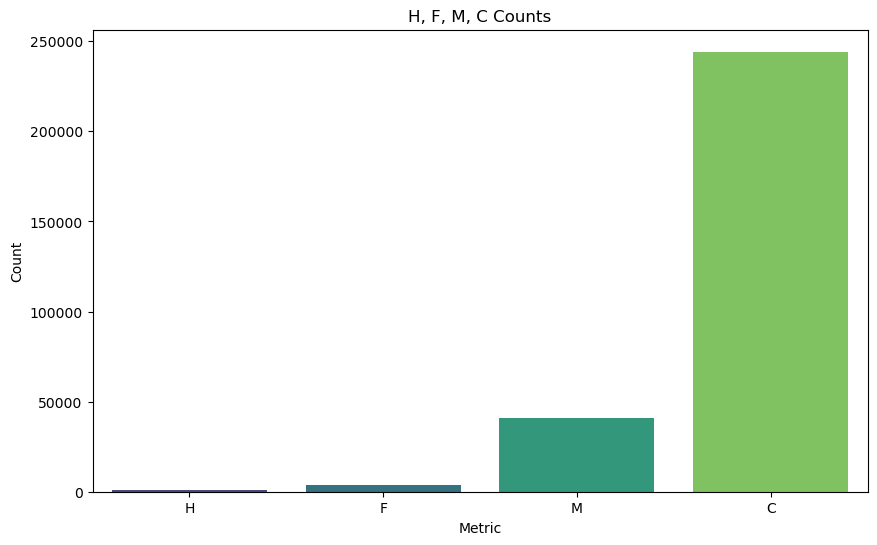

In [56]:
# 최종 예측 결과를 데이터프레임에 추가
results_df = pd.DataFrame({'estimated_rank': final_pred, 'rainfall_train.class_interval': y_test['rainfall_train.class_interval']})

# H, F, M, C 계산 함수
def calculate_csi_components(df):
    H = ((df['estimated_rank'] != 0) & (df['rainfall_train.class_interval'] != 0) & (df['estimated_rank'] == df['rainfall_train.class_interval'])).sum()
    F = ((df['estimated_rank'] != 0) & (df['estimated_rank'] != df['rainfall_train.class_interval'])).sum()
    M = ((df['estimated_rank'] == 0) & (df['rainfall_train.class_interval'] != 0)).sum()
    C = ((df['estimated_rank'] == 0) & (df['rainfall_train.class_interval'] == 0)).sum()
    return H, F, M, C

# CSI 계산 함수
def calculate_csi(H, F, M):
    return H / (H + F + M) if (H + F + M) > 0 else 0

# H, F, M, C 계산
H, F, M, C = calculate_csi_components(results_df)

# CSI 계산
csi_value = calculate_csi(H, F, M)
print(f"CSI: {csi_value}")
print(f"H: {H}, F: {F}, M: {M}, C: {C}")

# H, F, M, C 값 시각화
metrics = pd.DataFrame({'Metric': ['H', 'F', 'M', 'C'], 'Count': [H, F, M, C]})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Count', data=metrics, palette='viridis')
plt.title('H, F, M, C Counts')
plt.xlabel('Metric')
plt.ylabel('Count')
plt.show()

In [59]:
results_df['estimated_rank'].value_counts()

estimated_rank
0    285082
5      1853
7      1364
6      1284
9       137
3        16
8        13
4         4
Name: count, dtype: int64

제출용

In [94]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather/workspace/data/rainfall_test_1.csv')


# 문자열 값을 숫자로 변환
for column in test_df.columns:
    if test_df[column].dtype == object:
        test_df[column] = test_df[column].astype(str).astype('category').cat.codes

# 특성 추출 (class_interval을 제외한 나머지 열)
y_test = test_df['rainfall_test.class_interval']

X_test = test_df.drop(columns=['rainfall_test.class_interval'])

X_test['prob_0'] = 100 - X_test['rainfall_test.v01']
X_test['prob_1'] = X_test['rainfall_test.v01']- X_test['rainfall_test.v02']
X_test['prob_2'] = X_test['rainfall_test.v02'] - X_test['rainfall_test.v03']
X_test['prob_3'] = X_test['rainfall_test.v03'] - X_test['rainfall_test.v04']
X_test['prob_4'] = X_test['rainfall_test.v04'] - X_test['rainfall_test.v05']
X_test['prob_5'] = X_test['rainfall_test.v05'] - X_test['rainfall_test.v06']
X_test['prob_6'] = X_test['rainfall_test.v06'] - X_test['rainfall_test.v07']
X_test['prob_7'] = X_test['rainfall_test.v07'] - X_test['rainfall_test.v08']
X_test['prob_8'] = X_test['rainfall_test.v08'] - X_test['rainfall_test.v09']
X_test['prob_9'] = X_test['rainfall_test.v09']



features = [col for col in X_test.columns if 'prob_' in col] + ['rainfall_test.dh']
X_test = X_test[features]
X_test = X_test.rename(columns={'rainfall_test.dh': 'rainfall_train.dh'})


In [98]:
# 2. 각 모델을 이용한 예측 생성
rf_test_pred = catboost.predict(X_test)
gb_test_pred = lgbm.predict(X_test)
xgb_test_pred = xgb.predict(X_test)

# 3. 메타 모델을 이용한 최종 예측
stacked_test_features = np.column_stack((rf_test_pred, gb_test_pred, xgb_test_pred))
final_test_predictions = meta_model.predict(stacked_test_features)

# 4. 예측값을 원본 데이터에 병합
# 원본 데이터에 새로운 예측 열 추가
test_df['rainfall_test.class_interval'] = final_test_predictions

# 5. 병합된 데이터 저장
test_df.to_csv('rainfall_test_with_predictions.csv', index=False)

   rainfall_test.fc_year  rainfall_test.fc_month  rainfall_test.fc_day  \
0                      0                       5                     1   
1                      0                       5                     1   
2                      0                       5                     1   
3                      0                       5                     1   
4                      0                       5                     1   

   rainfall_test.fc_hour  rainfall_test.stn4contest  rainfall_test.dh  \
0                      9                          0                 3   
1                      9                          0                 6   
2                      9                          0                 9   
3                      9                          0                12   
4                      9                          0                15   

   rainfall_test.ef_year  rainfall_test.ef_month  rainfall_test.ef_day  \
0                      0                  

In [99]:
display(test_df.head())

,rainfall_test.fc_year,rainfall_test.fc_month,rainfall_test.fc_day,rainfall_test.fc_hour,rainfall_test.stn4contest,rainfall_test.dh,rainfall_test.ef_year,rainfall_test.ef_month,rainfall_test.ef_day,rainfall_test.ef_hour,rainfall_test.v01,rainfall_test.v02,rainfall_test.v03,rainfall_test.v04,rainfall_test.v05,rainfall_test.v06,rainfall_test.v07,rainfall_test.v08,rainfall_test.v09,rainfall_test.class_interval
0,0,5,1,9,0,3,0,5,1,12,68,46,13,1,0,0,0,0,0,0
1,0,5,1,9,0,6,0,5,1,15,83,66,26,5,0,0,0,0,0,0
2,0,5,1,9,0,9,0,5,1,18,17,6,0,0,0,0,0,0,0,0
3,0,5,1,9,0,12,0,5,1,21,0,0,0,0,0,0,0,0,0,0
4,0,5,1,9,0,15,0,5,2,0,0,0,0,0,0,0,0,0,0,0


In [100]:
test_df['rainfall_test.class_interval'].value_counts()

rainfall_test.class_interval
0    119860
5      1309
7       466
6       365
Name: count, dtype: int64

In [101]:
test_df.to_csv('./rainfall_test_with_predictions.csv', index=False)
